In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import os
sys.path.append("../../")
from neurotools.emg_tools.hd_sEMG import NeuroNexus_H32_tri,HD_sEMG
from neurotools.emg_tools.emg_channel import eEMG
from neurotools.ns5_tools.ns5_tools import ns5Files
from neurotools.utils.trigger import trigger as trigger_b
from neurotools.utils.plots import create_gif

## Let's look at the electrode geometry

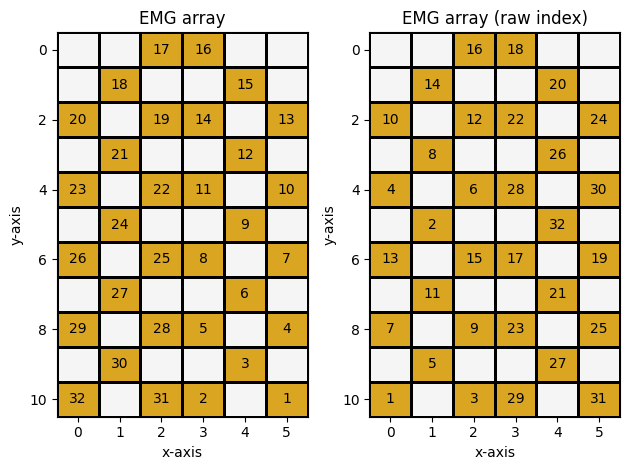

In [2]:
fig, axs = plt.subplots(1,2) 
NeuroNexus_H32_tri.plot_grid(axs[0])
NeuroNexus_H32_tri.plot_grid(axs[1], raw_idx=True)
fig.tight_layout()

##  Open a file and create a HD_sEMG object

In [3]:
##create or open the EMG arrays
keys = NeuroNexus_H32_tri.required_raw_keys() + ['Tr0 ', 'Tr1 ']

data_file = "./source/test_emg_array.hdf5"
overwrite = False
if not (os.path.isfile(data_file)) or overwrite:
    ns5_path = "./source/UA014_SEL_AS_MS_SGM0_0009.ns5"
    ns5_file = ns5Files(ns5_path)
    if set(keys).issubset(ns5_file.get_analog_entitie_labels()):
        ns5_file.to_hdf(data_file,keys)
    else:
        print("Requested keys not available")
        exit()

df_emg = pd.read_hdf(data_file)
test_HD_sEMG = HD_sEMG(df = df_emg, array = NeuroNexus_H32_tri)

trigger = trigger_b(df_emg['Tr0 '],df_emg['time'])                                    #add a trigger
test_HD_sEMG.trigger = trigger

## Plot raw data

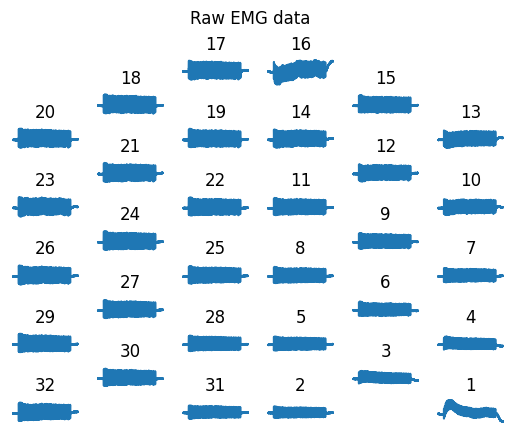

In [4]:
test_HD_sEMG.plot_raw()
plt.show()


## Filter and plot data

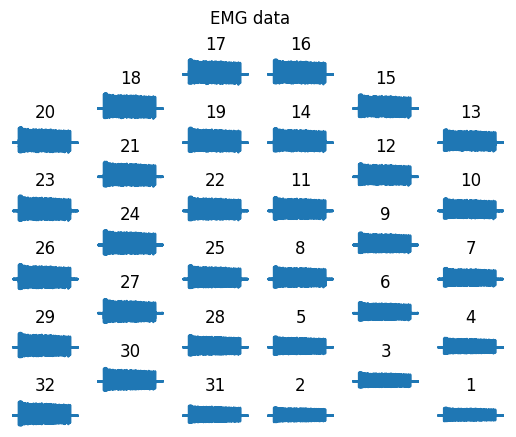

In [5]:
test_HD_sEMG.filter_eEMGs(f_LPF = 10_000, f_HPF = 10, n_LPF = 5, n_HFP = 5)
test_HD_sEMG.plot_data()
plt.show()

## Looking at eCMAPS

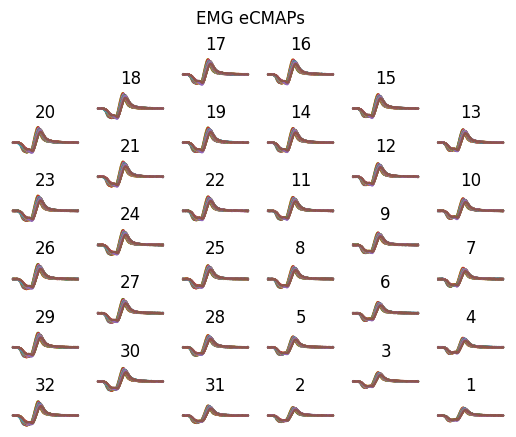

In [6]:
test_HD_sEMG.get_eCMAPS(duration = 0.015, delay = 0.001)
test_HD_sEMG.plot_eCMAPs()
plt.show()

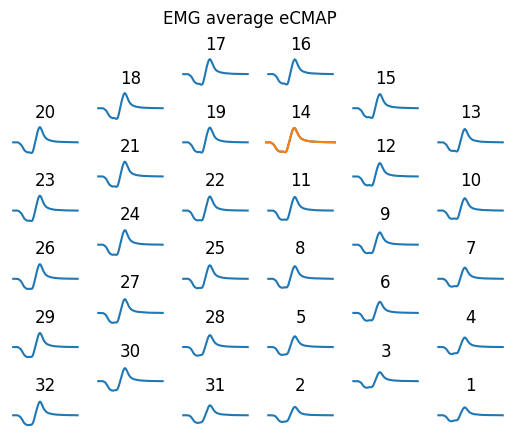

In [7]:
fig,axs = test_HD_sEMG.plot_avg_eCMAP()

electrode = 14                  #extract the EMG channel of electrode 14
emg_e1 = test_HD_sEMG.get_eEMG(electrode)
ax = test_HD_sEMG.get_eEMG_ax(axs, electrode) 
emg_e1.plot_avg_eCMAP(ax)
plt.show()

## Plot heatmaps etc

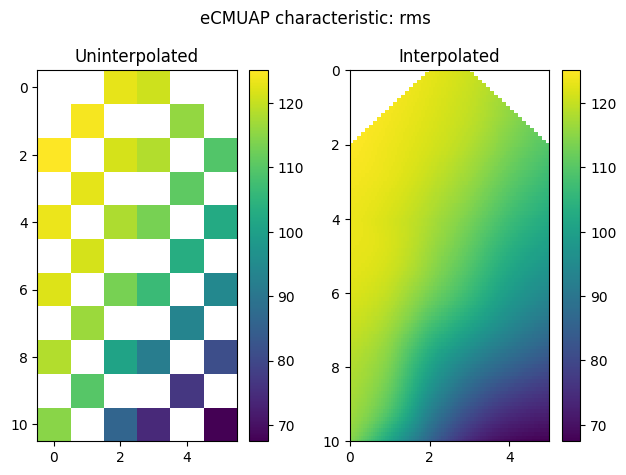

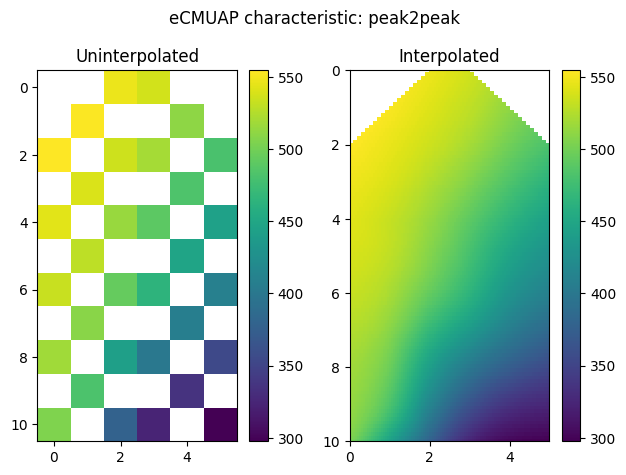

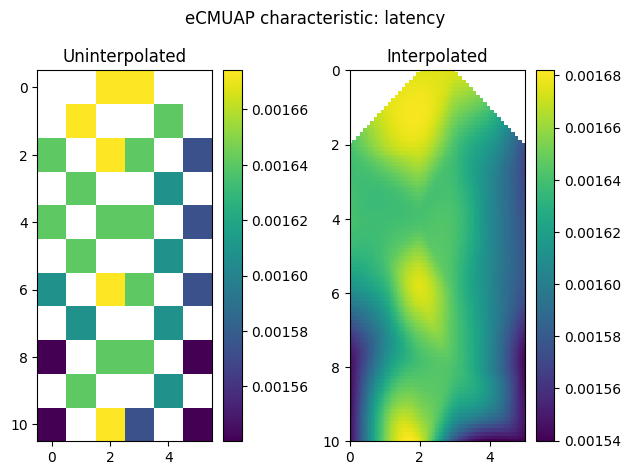

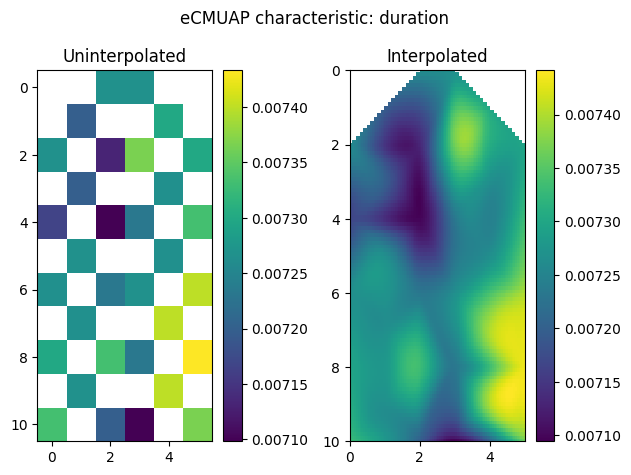

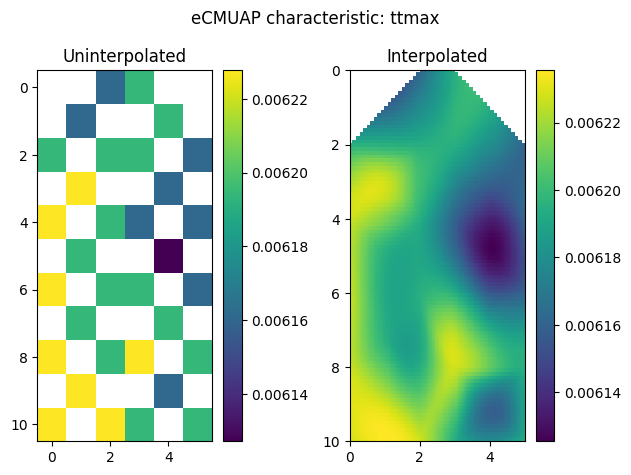

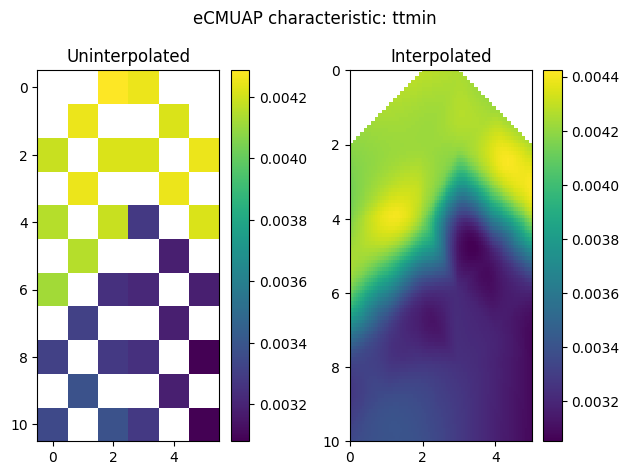

In [8]:
def plot_heatmap(data):
    fig, axs = plt.subplots(1,2) 
    sc = test_HD_sEMG.plot_heatmap_eCMAP(axs[0], data)
    fig.colorbar(sc, ax = axs[0])
    sc = test_HD_sEMG.plot_heatmap_eCMAP(axs[1], data, n_interp = 100)
    fig.colorbar(sc, ax = axs[1])
    fig.suptitle(f"eCMUAP characteristic: {data}")
    axs[0].set_title("Uninterpolated")
    axs[1].set_title("Interpolated")
    fig.tight_layout()

#plt.close("all")
plot_heatmap("rms")
plot_heatmap("peak2peak")
plot_heatmap("latency")
plot_heatmap("duration")
plot_heatmap("ttmax")
plot_heatmap("ttmin")
plt.show()

## 3D Timeshot and animation

In [9]:
min = test_HD_sEMG.eEMGs[0].avg_eCMAP.min*1.2
max = test_HD_sEMG.eEMGs[0].avg_eCMAP.max*1.2
n_interp = 15
def animate(i):
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    ax.set_zlim([350, -350])
    test_HD_sEMG.plot_avg_3D_timeshot(ax = ax, t_idx=i,n_interp = n_interp, min = min, max=max)
    return(fig)

t = test_HD_sEMG.eEMGs[0].avg_eCMAP.t

create_gif(animate,len(t),"outputs/emg_array.gif")



GIF creation: 100%|██████████| 449/449 [00:51<00:00,  8.72it/s]


Conversion to gif.... Done!
